In [15]:
# Mount on Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
# Load necessary libraries
import sys
import os
import cv2 as cv
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np



# **Preprocessing for face mask detection data**

In [ ]:
# load Labels and Bounding Box data
y_labels = pd.read_csv("/content/gdrive/MyDrive/Face_mask_detection/face_mask_data/train.csv")

In [ ]:
# Remove Duplicates and other Labels
options = ['face_with_mask','face_no_mask']
y_labels = y_labels[y_labels['classname'].isin(options)].sort_values('name')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encode classname column since it has inly to classes
y_labels['target'] = le.fit_transform(y_labels.classname)
print("Number of unique images in y_labels set: ", y_labels.name.nunique())
y_labels.head()


Number of unique images in y_labels set:  3390


,name,x1,x2,y1,y2,classname,target
13381,1801.jpg,451,186,895,697,face_no_mask,0
3463,1802.jpg,110,71,273,272,face_with_mask,1
14835,1803.jpg,126,75,303,333,face_with_mask,1
5867,1804.jpg,112,113,262,307,face_with_mask,1
6194,1805.jpg,728,180,853,336,face_with_mask,1


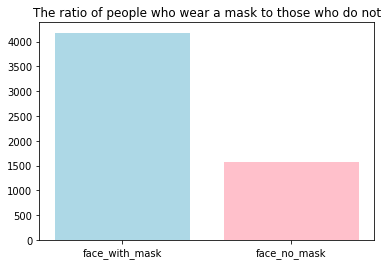

In [ ]:
plt.bar(['face_with_mask','face_no_mask'], y_labels.classname.value_counts(), color = ['lightblue','pink']);
plt.title('The ratio of people who wear a mask to those who do not');

In [ ]:
# Get names of Images in Data
train_images = y_labels.name.unique().tolist()

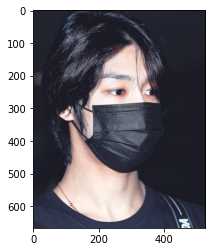

In [ ]:
# pick a random index from train_images
img_dir = '/content/gdrive/MyDrive/Face_mask_detection/face_mask_data/data/images'
i = np.random.choice(np.arange(1801, len(train_images)))
# read image
img = plt.imread(os.path.join(img_dir,train_images[i]))
# plot image
plt.imshow(img)

## **Getting Bounding Boxes**

In [ ]:
# create a list that would contain bounding boxes for each face
bounding_box=[]
for i in range(len(y_labels)):
    lst = []
    # extract coordinates of bounding box
    for box in y_labels.iloc[i][["x1",'x2','y1','y2']]:
        lst.append(box)
    bounding_box.append(lst)
    
#add new column with bounding boxes
y_labels["bounding_box"] = bounding_box  

# get box(es) for each unique image
def get_boxes(filename):
    boxes = []
    # get bounding_box column for all rows where y_labels["name"] == filename
    for box in y_labels[y_labels["name"] == filename]["bounding_box"]:
        boxes.append(box)
    return boxes


[[71, 86, 153, 196], [170, 150, 271, 248], [307, 1, 415, 115], [303, 453, 419, 576], [698, 312, 818, 435], [593, 250, 689, 359], [752, 125, 840, 229], [642, 3, 727, 118], [15, 196, 102, 312]]


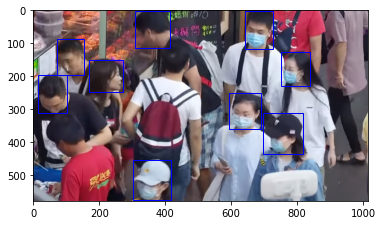

In [ ]:
def draw_facebox(image, boxes):
    # plot the image
    plt.imshow(image)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for box in boxes:
    # get coordinates
        x, y, width, height = box[0], box[1], box[2], box[3],
        # create the shape
        rect = plt.Rectangle((x, y), width-x, height-y, 
                             fill=False, color='b', linewidth=1)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()
    
# pick a random index from train_images
i = np.random.choice(np.arange(1801, len(train_images)))
# read image
image = plt.imread(os.path.join(img_dir,train_images[i]))
# get boxes for image
boxes = get_boxes(train_images[i])
print(boxes)
draw_facebox(image, boxes)

# Image size = 128

In [ ]:
# Make Train Images of Cropped Images
img_size=128
data=[]
for i in range(len(y_labels)):
    # Get Bounding Box
    x,y,width,height = y_labels.iloc[i]['bounding_box']
    image = y_labels.iloc[i]['name']
    # Read Image
    img_array = cv.imread(os.path.join(img_dir,image)) 
    # Crop image with bounding box
    img_cropped = img_array[y:height,x:width] 
    # Resize cropped image
    # img_cropped = np.array(img_cropped, dtype = float)
    img = cv.resize(img_cropped,(img_size,img_size), cv.INTER_AREA)
    data.append([img,y_labels.iloc[i]['target']])  

## **Saving Preprocessed Data**

In [ ]:
# Save the data
import pickle
with open("/content/gdrive/MyDrive/Face_mask_detection/face_mask_data/preprocessed_data.txt", "wb") as fp:   #Pickling
  pickle.dump(data, fp) 


# **Preprocessing for Face Detection Data**